In [1]:
# Import the libraries
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

In [2]:
# Creat paths for convenience
train_path = '../../Food-5K/data/train'
valid_path = '../../Food-5K/data/test'

In [3]:
# Load all the images as a smaller size
IMAGE_SIZE = [200, 200]

In [4]:
# Useful for getting number of files
train_image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')

print(len(train_image_files))
print(len(valid_image_files))

3000
1000


In [5]:
# Useful for getting number of classes
folders = glob(train_path + '/*')
len(folders)

2

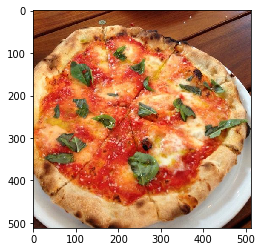

In [6]:
# Load a random image for fun
plt.imshow(image.load_img(np.random.choice(train_image_files)));

In [7]:
# Create instance of the ImageDataGenerator
gen = ImageDataGenerator(rotation_range=20,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         shear_range=0.2,
                         zoom_range=0.2,
                         horizontal_flip=True)

In [8]:
# Define batch size
batch_size = 64

# Create train generator
train_generator = gen.flow_from_directory(train_path,
                                          target_size=IMAGE_SIZE,
                                          batch_size=batch_size,
                                          class_mode='binary')

Found 3000 images belonging to 2 classes.


In [9]:
# Create valid generator
valid_generator = gen.flow_from_directory(valid_path,
                                          target_size=IMAGE_SIZE,
                                          batch_size=batch_size, 
                                          class_mode='binary')

Found 1000 images belonging to 2 classes.


In [10]:
# Define the layers - this architecture takes inspiration from the VGG architecture
i = Input(shape=IMAGE_SIZE + [3])

x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1, activation='sigmoid')(x)

In [11]:
# Create the model
model = Model(i, x)

In [12]:
# Define how the model should be trained
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.000001),
              metrics=['accuracy'])

In [13]:
# Have a look at the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 200, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 200, 200, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 98, 98, 64)        18496 

In [14]:
# Train the model
result = model.fit_generator(train_generator,
                             validation_data=valid_generator,
                             epochs=30,
                             steps_per_epoch=int(np.ceil(len(train_image_files) / batch_size)),
                             validation_steps=int(np.ceil(len(valid_image_files) / batch_size)))

Epoch 1/30
47/47 [==============================] - 43s 912ms/step - loss: 0.8892 - accuracy: 0.5837 - val_loss: 0.6633 - val_accuracy: 0.5810
Epoch 2/30
47/47 [==============================] - 37s 780ms/step - loss: 0.6533 - accuracy: 0.7107 - val_loss: 0.6102 - val_accuracy: 0.6640
Epoch 3/30
47/47 [==============================] - 38s 800ms/step - loss: 0.6323 - accuracy: 0.7340 - val_loss: 0.5382 - val_accuracy: 0.7290
Epoch 4/30
47/47 [==============================] - 37s 795ms/step - loss: 0.5906 - accuracy: 0.7590 - val_loss: 0.4854 - val_accuracy: 0.7610
Epoch 5/30
47/47 [==============================] - 37s 794ms/step - loss: 0.5567 - accuracy: 0.7737 - val_loss: 0.4682 - val_accuracy: 0.7840
Epoch 6/30
47/47 [==============================] - 37s 785ms/step - loss: 0.5619 - accuracy: 0.7750 - val_loss: 0.4251 - val_accuracy: 0.8180
Epoch 7/30
47/47 [==============================] - 37s 785ms/step - loss: 0.5066 - accuracy: 0.7920 - val_loss: 0.4357 - val_accuracy: 0.8110

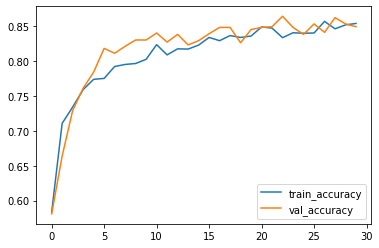

In [15]:
# Plot the cost function at each itteration
plt.plot(result.history['accuracy'], label='train_accuracy');
plt.plot(result.history['val_accuracy'], label='val_accuracy');
plt.legend();